In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.stats import chi2
import os.path as path


# Punto 1

### a)

In [2]:
# Definición de las funciones

def primera_linea(x):
    return 2*x - 2 

def segunda_linea(x):
    return (1-x) / 2 

def tercera_linea(x):
    return 4-x 


In [3]:

x = range(-5,5)


In [4]:

coeficientes = ([2,-1], [1,2], [1,1])
resultados = (2,1,4)

Coeficientes = np.array(coeficientes)
Resultados = np.array(resultados)

Transpuesta_coeff = np.dot(Coeficientes.T, Coeficientes)
Transpuesta_resul = np.dot(Coeficientes.T, Resultados)

solucion = np.linalg.solve(Transpuesta_coeff,Transpuesta_resul)
solucion


array([1.42857143, 0.42857143])

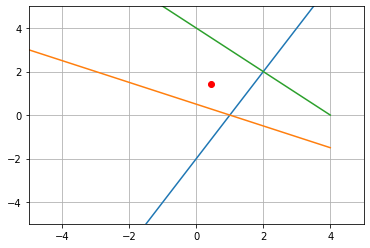

In [5]:

plt.plot(x,[primera_linea(i) for i in x ])
plt.plot(x,[segunda_linea(i) for i in x ])
plt.plot(x,[tercera_linea(i) for i in x ])
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.scatter(solucion[1],solucion[0],c='r')
plt.grid()


A partir del ejercicio realizado se puede interpretar que el metodo de minimos cuadrados nos arroja el punto más cercano a las 3 rectas definidas en la función. Ya que en este caso este punto, como se puede observar en la gráfica no se refiere al punto de intersección entre ellas. 

### b)

In [6]:

x = np.linspace(-5,5,333)
y = np.copy(x)


In [7]:

X,Y = np.meshgrid(x,y)
Valores = np.zeros((333,333))


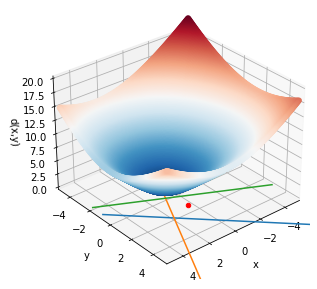

In [8]:

for i in range(len(y)):
    for j in range (len(x)):
        puntos = np.array([x[j],y[i]])
        Valores[i,j] = np.linalg.norm(np.dot(Coeficientes,puntos)-Resultados)
    

valor_minimo = np.min(Valores)
j,i = np.where(Valores == valor_minimo)   
punto_minimo = np.array([float(x[j]),float(y[i])])
 
    
plano = plt.figure(figsize=(5,5))
subplano = plano.add_subplot(111, projection = '3d')

subplano.set_xlim3d(-5, 5)
subplano.set_ylim3d(-5, 5)
subplano.set_zlim3d(0, 20)

subplano.set_zlabel('d(x,y)')
subplano.set_xlabel('x')
subplano.set_ylabel('y')
subplano.view_init(30, 50)

subplano.scatter(X,Y,Valores, c = Valores, cmap= 'RdBu_r',alpha=0.5)
subplano.scatter(punto_minimo[0],punto_minimo[1],c='r')

subplano.grid()
subplano.plot(x,tercera_linea(x))
subplano.plot(x,primera_linea(x))
subplano.plot(x,segunda_linea(x))
plt.show()


Al tener en cuenta el valor dado en el punto a. Se puede determinar que el minimo cuadrado se aproxima al valor de la gráfica, dado que es la parte más cercana a las rectas, es decir el punto (1.42857143, 0.42857143). 